# Select white individuals from db from those that have exome sequences

This notebook illustrates the process of selecting white individuals that have exome sequences for the downstream analysis (LMM.ipynb)

In [ ]:
#Load libraries
library(plyr)
library(tidyverse)
library(pander)
library(ggpubr)
library(rapportools)
library(ggplot2)
#Get working directory
getwd()
#Set working directory
setwd('/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes')

In [2]:
# Clean workspace
rm(list=ls())

First of all read the fam file associated to the exome data. There are 200,643 individuals with WES.

In [3]:
fam <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_s200631.fam", sep=' ', header=F)
colnames(fam) <- c("FID","IID","fatherID", "motherID", "sex", "phenotype")
head(fam)
dim(fam)

,FID,IID,fatherID,motherID,sex,phenotype
,<int>,<int>,<int>,<int>,<int>,<int>
1,1434748,1434748,0,0,2,-9
2,5523981,5523981,0,0,1,-9
3,5023838,5023838,0,0,2,-9
4,4023729,4023729,0,0,1,-9
5,4442146,4442146,0,0,2,-9
6,5654789,5654789,0,0,2,-9


[1] 200643      6

In this step, we import the full database containing all the phenotypic info from the UKBB. This contains information for 502,505 individuals and
6613 columns.

In [5]:
# Import the database to R with all the variable codings. Memory needed 80GB
bd <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb42495_updatedJune2020/ukb42495.tab", sep="\t", header=T)

In [5]:
#Number or rows in bd
dim(bd)
head(bd[,1, drop=FALSE])

[1] 502505   6613

,f.eid
,<int>
1,6025442
2,1000019
3,1000022
4,1000035
5,1000046
6,1000054


In [6]:
# Assign individual ID column to bd f.eid
names(bd)[1] <- "IID"
head(bd[,1, drop=FALSE])

,IID
,<int>
1,6025442
2,1000019
3,1000022
4,1000035
5,1000046
6,1000054


Subset the individuals with exomes from the full database. In this step 200,631 individuals remain (12 withdrawn from study)

In [28]:
exomed_IID <- bd[bd$IID %in% fam$IID,]
exomed_ind <- exomed_IID[, "IID"]
dim(exomed_IID)
head(exomed_IID)

Identify which individuals were or not sequenced from the full db

In [29]:
#f.22009 principal components
#f.22006 genetic ethnic grouping
#f.21000 ethnic background
bd_pca <- bd %>%  
    select(IID,
           starts_with("f.22009"),
           starts_with("f.22006"),
           starts_with("f.21000")) %>%
    mutate(WES=if_else(IID%in%exomed_ind,"1","0"))
head(bd_pca)
dim(bd_pca)

,IID,f.22009.0.1,f.22009.0.2,f.22009.0.3,f.22009.0.4,f.22009.0.5,f.22009.0.6,f.22009.0.7,f.22009.0.8,f.22009.0.9,⋯,f.22009.0.36,f.22009.0.37,f.22009.0.38,f.22009.0.39,f.22009.0.40,f.22006.0.0,f.21000.0.0,f.21000.1.0,f.21000.2.0,WES
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
1,6025442,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
2,1000019,-12.2053,4.76174,-4.25570,3.40438,-0.658608,0.782260,2.46875,0.870685,-8.79311,⋯,3.41345,-3.65638,-0.146136,-1.74808,0.0766507,1,1001,NA,NA,1
3,1000022,-11.0907,2.93694,-2.83272,-1.16121,-7.517080,-3.193180,-1.38290,-1.901870,1.65703,⋯,-3.98978,3.35086,-0.226358,-1.64457,-2.7941000,1,1001,NA,NA,0
4,1000035,-15.2753,1.34975,-2.99361,8.39502,17.040800,1.702570,-1.47434,0.977063,4.29165,⋯,1.29770,-1.60734,1.774000,-2.62669,1.6079300,1,1001,NA,NA,1
5,1000046,-13.8809,5.01353,-1.77091,3.73010,6.774160,-2.293770,1.76893,-0.409260,2.27147,⋯,2.52143,1.84519,0.518179,-1.97682,3.8931000,1,1001,NA,NA,0
6,1000054,-13.4765,6.71309,-3.98852,4.35470,8.732250,-0.496887,3.40731,0.491270,1.17219,⋯,1.24627,-1.84256,-2.977780,-2.09987,0.2277160,1,1001,NA,NA,0


[1] 502505     46

In [28]:
# Save as csv file
write.csv(exomed_ind,'112420_ukb42495_exomed_ind.csv', row.names = FALSE)

## Read the csv file containing all of the exomed individuals

In [4]:
# Read csv file 
exomed_IID <- read.csv("/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes/112420_ukb42495_exomed_ind.csv", header=T)

Identify which individuals were filtered out.

In [26]:
withdrawn_iid <- setdiff(fam[,'IID'],exomed_IID[,'IID'])
withdrawn_iid

[1]  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12

Now, subset the full db to include only the information for the exomed individuals and ethnicity

In [5]:
# Filter db based on ethnicity variable
ethnicity <- exomed_IID %>%
    select(IID, starts_with("f.21000"))
head(ethnicity)
dim(ethnicity)
ethnicity %>% filter(f.21000.0.0 %in% c (-3,-1))

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0
,<int>,<int>,<int>,<int>
1,1000019,1001,NA,NA
2,1000035,1001,NA,NA
3,1000078,1001,1001,1001
4,1000081,1001,NA,NA
5,1000198,1001,NA,NA
6,1000210,1001,NA,NA


[1] 200631      4

IID,f.21000.0.0,f.21000.1.0,f.21000.2.0
<int>,<int>,<int>,<int>
1000701,-3,NA,NA
1008909,-3,NA,NA
1053449,-3,NA,NA
1057699,-3,NA,NA
1057984,-3,NA,1001
1081614,-3,NA,NA
1084388,-3,NA,NA
1084601,-3,NA,NA
1088433,-3,NA,NA


### Replace -3 and -1 with NA

In [104]:
ethnicity_new <- ethnicity %>%
    mutate_all(na_if,-3) %>%
    mutate_all(na_if,-1)
ethnicity_new[which(ethnicity_new$IID%in%c(6016238,1149548)),]

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0
,<int>,<int>,<int>,<int>
6014,1149548,NA,NA,NA
200252,6016238,NA,NA,NA


Extract the information for difference instances of ethnicity and confirm match

In [105]:
# Function to extract all the available answers for 4 visits
# and put them in one list
f<-function(x){
  visit<-c()
  for (i in 2:4){
    if (!is.na(x[i]))
    {visit<-c(visit,x[i])}
  }
  if(is.null(visit)){visit='-99'} #give a code to those that replied prefer not to answer or don't know
  else{visit=as.numeric(visit)}
  return (visit)
}

# Apply the above function and remove NAs
ethnicity$visit<-apply(ethnicity, 1, f)
head(ethnicity)
dim(ethnicity)
ethnicity_new$visit<-apply(ethnicity_new, 1, f)
head(ethnicity_new)
dim(ethnicity_new)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit
,<int>,<int>,<int>,<int>,<list>
1,1000019,1001,NA,NA,1001
2,1000035,1001,NA,NA,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001"
4,1000081,1001,NA,NA,1001
5,1000198,1001,NA,NA,1001
6,1000210,1001,NA,NA,1001


[1] 200631      5

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit
,<int>,<int>,<int>,<int>,<list>
1,1000019,1001,NA,NA,1001
2,1000035,1001,NA,NA,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001"
4,1000081,1001,NA,NA,1001
5,1000198,1001,NA,NA,1001
6,1000210,1001,NA,NA,1001


[1] 200631      5

Filter out individuals with missing data for ethnicity. A total of 212 individuals were removed

In [106]:
# Filter out individuals wih missing values in ethnicity: 212 ind total
ethnicity <- ethnicity %>%
  filter(!is.na(visit))
dim(ethnicity)

[1] 200631      5

Individuals that were kept after making -3 and -1 NA

In [107]:
ethnicity_new <- ethnicity_new %>%
  filter(!is.na(visit))
dim(ethnicity_new)

[1] 200631      5

In [108]:
# Identify the unique available codings in f.21000
code<-union(union(unique(ethnicity$f.21000.0.0),unique(ethnicity$f.21000.1.0)),unique(ethnicity$f.21000.2.0))

In [109]:
# There are 23 unique codes for the variable
length(code)
code

[1] 23

[1] 1001    6 1003 1002 4001   -3 4002 3001 2001 3002 3004 2004    1    5 2003
[16] 2002   NA 3003    3   -1 4003    2    4

In [110]:
# Identify the unique available codings in f.21000
code<-union(union(unique(ethnicity_new$f.21000.0.0),unique(ethnicity_new$f.21000.1.0)),unique(ethnicity_new$f.21000.2.0))

In [111]:
# There are 23 unique codes for the variable
length(code)
code

[1] 21

[1] 1001    6 1003 1002 4001   NA 4002 3001 2001 3002 3004 2004    1    5 2003
[16] 2002 3003    3 4003    2    4

## Filter individuals based on their ethnicity

Filter white individuals

In [112]:
useful_code<-c(1001,1002,1003,1) # Keep only white individuals
useful_code # would like to keep those that have different combinations of useful_code, output it as 9000 

[1] 1001 1002 1003    1

In [113]:
useless_code<-code[!code %in% useful_code] # the rest that don’t have the combinations above can be set as NA
useless_code<-useless_code[-which(is.na(useless_code))] # remove NA here in the vector
useless_code

[1]    6 4001 4002 3001 2001 3002 3004 2004    5 2003 2002 3003    3 4003    2
[16]    4

Filter non-white individuals

In [19]:
useful_code_nonwhite <- c(2001,3001,4001,2002,3002,4002,2003,3003,4003,2004,3004,2,3,4,5,6,-3,-1) # keep non-white and combinations
useful_code_nonwhite

[1] 2001 3001 4001 2002 3002 4002 2003 3003 4003 2004 3004    2    3    4    5
[16]    6   -3   -1

In [20]:
useless_code<-code[!code %in% useful_code_nonwhite] # the rest that don’t have the combinations above can be set as NA
useless_code<-useless_code[-which(is.na(useless_code))] # remove NA here in the vector
useless_code

[1] 1001 1003 1002    1

1. Dataset: Select individuals whose ethnicity is: 

* British:1001
* Irish:1002
* Other white background:1003
* White:1
* Prefer not to answer:-3
* Do not know:-1

2. Dataset: Select the rest of non-white individuals

In [123]:
# Function to get the final code for ethnicity
f<-function(x){
  l=length(unique(x$visit))
  if (l==1){ # only one value available
    result=unique(x$visit)
  }
  else{ # more then one value available
    l=length(x$visit)
    for (i in 1:l){
      if (x$visit[i] %in% useless_code){result=8000; break} # inconsistent ones with combination not wanted
      else {result=9000} # inconsistent ones with right combination
    }
  }
  return(result)
}

# Apply the above function and remove NAs
ethnicity$new_ethnicity<-apply(ethnicity, 1, f)
head(ethnicity,100)
ethnicity_new$new_ethnicity<-apply(ethnicity_new, 1, f)
head(ethnicity_new,100)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
1,1000019,1001,NA,NA,1001,1001
2,1000035,1001,NA,NA,1001,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001",1001
4,1000081,1001,NA,NA,1001,1001
5,1000198,1001,NA,NA,1001,1001
6,1000210,1001,NA,NA,1001,1001
7,1000224,1001,NA,NA,1001,1001
8,1000236,1001,NA,NA,1001,1001
9,1000255,1001,NA,NA,1001,1001


,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
1,1000019,1001,NA,NA,1001,1001
2,1000035,1001,NA,NA,1001,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001",1001
4,1000081,1001,NA,NA,1001,1001
5,1000198,1001,NA,NA,1001,1001
6,1000210,1001,NA,NA,1001,1001
7,1000224,1001,NA,NA,1001,1001
8,1000236,1001,NA,NA,1001,1001
9,1000255,1001,NA,NA,1001,1001


Make sure that those individuals with combination of the right ethnicities are outputed as 9000

In [124]:
ethnicity[which(ethnicity$new_ethnicity%in%9000),]
nrow(ethnicity[which(ethnicity$new_ethnicity%in%9000),]) # Number of individuals with inconsistent codes 442

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
300,1007061,1002,NA,1001,"1002, 1001",9000
2349,1057984,-3,NA,1001,"-3, 1001",9000
2425,1059988,1001,1002,1001,"1001, 1002, 1001",9000
3155,1077383,1001,1002,NA,"1001, 1002",9000
4363,1108028,1001,1002,NA,"1001, 1002",9000
4438,1110004,1001,-3,NA,"1001, -3",9000
4497,1111668,1003,1001,NA,"1003, 1001",9000
5346,1133245,1003,1001,NA,"1003, 1001",9000
5606,1139512,1001,1003,1001,"1001, 1003, 1001",9000


[1] 442

In [125]:
ethnicity_new[which(ethnicity_new$new_ethnicity%in%9000),]
nrow(ethnicity_new[which(ethnicity_new$new_ethnicity%in%9000),]) # Number of individuals with inconsistent codes 383

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
300,1007061,1002,NA,1001,"1002, 1001",9000
2425,1059988,1001,1002,1001,"1001, 1002, 1001",9000
3155,1077383,1001,1002,NA,"1001, 1002",9000
4363,1108028,1001,1002,NA,"1001, 1002",9000
4497,1111668,1003,1001,NA,"1003, 1001",9000
5346,1133245,1003,1001,NA,"1003, 1001",9000
5606,1139512,1001,1003,1001,"1001, 1003, 1001",9000
5943,1147612,1002,NA,1001,"1002, 1001",9000
7109,1177069,1001,NA,1003,"1001, 1003",9000


[1] 383

In [126]:
ethnicity[which(ethnicity$new_ethnicity%in%8000),]
nrow(ethnicity[which(ethnicity$new_ethnicity%in%8000),]) # Number of individuals with inconsistent codes of the unwanted cominations 112

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
4421,1109575,1001,NA,6,"1001, 6",8000
7398,1184372,3001,3002,NA,"3001, 3002",8000
7666,1191120,2002,2002,2004,"2002, 2002, 2004",8000
7790,1194419,6,1001,NA,"6, 1001",8000
7960,1198980,1003,NA,6,"1003, 6",8000
11931,1298050,4003,NA,2002,"4003, 2002",8000
13136,1328519,4002,-3,NA,"4002, -3",8000
14341,1357544,6,-3,NA,"6, -3",8000
18057,1449162,6,-3,NA,"6, -3",8000


[1] 112

In [127]:
ethnicity_new[which(ethnicity_new$new_ethnicity%in%8000),]
nrow(ethnicity_new[which(ethnicity_new$new_ethnicity%in%8000),]) # Number of individuals with inconsistent codes of the unwanted combinations 96

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
4421,1109575,1001,NA,6,"1001, 6",8000
7398,1184372,3001,3002,NA,"3001, 3002",8000
7666,1191120,2002,2002,2004,"2002, 2002, 2004",8000
7790,1194419,6,1001,NA,"6, 1001",8000
7960,1198980,1003,NA,6,"1003, 6",8000
11931,1298050,4003,NA,2002,"4003, 2002",8000
18096,1450255,4002,6,NA,"4002, 6",8000
19522,1485418,2001,2004,NA,"2001, 2004",8000
21753,1542717,2003,NA,2,"2003, 2",8000


[1] 96

In [128]:
ethnicity_new[which(ethnicity_new$new_ethnicity%in%-99),]
nrow(ethnicity_new[which(ethnicity_new$new_ethnicity%in%-99),]) # Number of individuals with missing data for ethnicity 966

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
34,1000701,NA,NA,NA,-99,-99
363,1008909,NA,NA,NA,-99,-99
1869,1045757,NA,NA,NA,-99,-99
2168,1053449,NA,NA,NA,-99,-99
2332,1057699,NA,NA,NA,-99,-99
2908,1071240,NA,NA,NA,-99,-99
3316,1081614,NA,NA,NA,-99,-99
3417,1084388,NA,NA,NA,-99,-99
3429,1084601,NA,NA,NA,-99,-99


[1] 966

Make sure individuals with other combinations are set to missing

In [129]:
ethnicity[which(ethnicity$IID%in%c(1109575,1198980,1298050,1328519,1357644,1449162,1450255,2913726)),]

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
4421,1109575,1001,NA,6,"1001, 6",8000
7960,1198980,1003,NA,6,"1003, 6",8000
11931,1298050,4003,NA,2002,"4003, 2002",8000
13136,1328519,4002,-3,NA,"4002, -3",8000
18057,1449162,6,-3,NA,"6, -3",8000
18096,1450255,4002,6,NA,"4002, 6",8000
76532,2913726,-1,NA,-3,"-1, -3",9000


Subset those individuals without missing values for ethnicity. At this point 112 individual were excluded because they were inconsistent for ethnicity.

In the ethnicity_new dataset all of the individuals are kept -99 refers to those that don't have data for ethnicity

In [130]:
ethnicity_noNA<-ethnicity %>%
  filter(!is.na(new_ethnicity))
head(ethnicity_noNA, 10) # note: code generated here is numeric, not factor
dim(ethnicity_noNA)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
1,1000019,1001,NA,NA,1001,1001
2,1000035,1001,NA,NA,1001,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001",1001
4,1000081,1001,NA,NA,1001,1001
5,1000198,1001,NA,NA,1001,1001
6,1000210,1001,NA,NA,1001,1001
7,1000224,1001,NA,NA,1001,1001
8,1000236,1001,NA,NA,1001,1001
9,1000255,1001,NA,NA,1001,1001


[1] 200631      6

In [131]:
ethnicity_noNA_new <-ethnicity_new %>%
  filter(!is.na(new_ethnicity))
head(ethnicity_noNA_new, 10) # note: code generated here is numeric, not factor
dim(ethnicity_noNA_new)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>
1,1000019,1001,NA,NA,1001,1001
2,1000035,1001,NA,NA,1001,1001
3,1000078,1001,1001,1001,"1001, 1001, 1001",1001
4,1000081,1001,NA,NA,1001,1001
5,1000198,1001,NA,NA,1001,1001
6,1000210,1001,NA,NA,1001,1001
7,1000224,1001,NA,NA,1001,1001
8,1000236,1001,NA,NA,1001,1001
9,1000255,1001,NA,NA,1001,1001


[1] 200631      6

In [132]:
ethnicity_isNA <- ethnicity %>%
  filter(is.na(new_ethnicity))
head(ethnicity_isNA)
dim(ethnicity_isNA)

IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity
<int>,<int>,<int>,<int>,<list>,<chr>


[1] 0 6

In [133]:
dim(ethnicity_noNA) # for white N=200307 | non-white N=200419
dim(ethnicity_isNA) # for white N=112 | non-white N=0

[1] 200631      6

[1] 0 6

Filter out non-white individuals. After applying this filter 189016 individuals are white and therefore retained for further analyses.

This number is TRUE when the useful code is defined as `useful_code<-c(1001,1002,1003,1,-3,-1)`

In [135]:
# Filter out the non-white individuals e.g: 5,6,2004,3004,4001,etc
white <- ethnicity_noNA %>%
    filter(new_ethnicity %in% c(1,1001,1002,1003,-99,9000)) %>%
    mutate(FID = IID) %>%
    select(FID,IID)
head(white)
dim(white)

,FID,IID
,<int>,<int>
1,1000019,1000019
2,1000035,1000035
3,1000078,1000078
4,1000081,1000081
5,1000198,1000198
6,1000210,1000210


[1] 188475      2

In [137]:
# Filter out the non-white individuals e.g: 5,6,2004,3004,4001,etc N=189,228
white_2 <- ethnicity_noNA_new %>%
    filter(new_ethnicity %in% c(1,1001,1002,1003,-99,9000)) %>%
    mutate(FID = IID) %>%
    select(FID,IID)
head(white_2)
dim(white_2)

,FID,IID
,<int>,<int>
1,1000019,1000019
2,1000035,1000035
3,1000078,1000078
4,1000081,1000081
5,1000198,1000198
6,1000210,1000210


[1] 189228      2

After retaining all non-white individuals, we are left with 11403 samples. This dataset is complementary to the white dataset. 

In [136]:
# This will remove those present in the white dataset
non_white <- ethnicity_noNA %>%
    filter(!new_ethnicity %in% c(1,1001,1002,1003,-99,9000)) %>%
    mutate(FID = IID) %>%
    select(FID,IID,new_ethnicity )
head(non_white)
dim(non_white)

,FID,IID,new_ethnicity
,<int>,<int>,<chr>
1,1000272,1000272,6
2,1000660,1000660,6
3,1000697,1000697,4001
4,1000701,1000701,-3
5,1001447,1001447,4001
6,1002004,1002004,4002


[1] 12156     3

In [139]:
# This will remove those present in the white dataset
non_white_2 <- ethnicity_noNA_new %>%
    filter(!new_ethnicity %in% c(1,1001,1002,1003,-99,9000)) %>%
    mutate(FID = IID) %>%
    select(FID,IID,new_ethnicity)
head(non_white_2)
dim(non_white_2)

,FID,IID,new_ethnicity
,<int>,<int>,<chr>
1,1000272,1000272,6
2,1000660,1000660,6
3,1000697,1000697,4001
4,1001447,1001447,4001
5,1002004,1002004,4002
6,1002354,1002354,4001


[1] 11403     3

## Recode non_white sample in 2 groups: Afican and Asian ancestry

**African**

* 2001: White and Black caribbean 
* 2002: White and Black African
* 4: Black or Black British
* 4001: Caribbean 
* 4002: African
* 4003: Any other Black background

**Asian**

* 2003: White and Asian
* 3: Asian or Asian British
* 3001: Indian
* 3002: Pakistani
* 3003: Bangladeshi
* 3004: Any other Asian background

Remove: Irish, Any other white background, British, Chinese, other ethnic group

In [155]:
recode_nonwhite <- ethnicity_noNA_new %>%
    filter(IID %in% non_white_2$IID) %>%
    mutate(ethnicity = case_when(
         new_ethnicity %in% c(2001,2002,4,4001,4002,4003) ~ "African",
         new_ethnicity  %in% c(2003,3,3001,3002,3003,3004) ~  "Asian",
         new_ethnicity == 6 ~ "Other ethnic group",
         new_ethnicity == 5 ~ "Chinese",
         new_ethnicity == 8000 ~ "Inconsistent",
         new_ethnicity == -99 ~ "Unknown",
         new_ethnicity == 2004 ~ "Any other mixed background",
         TRUE  ~ ""))
head(recode_nonwhite, 100)
dim(recode_nonwhite)

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity,ethnicity
,<int>,<int>,<int>,<int>,<list>,<chr>,<chr>
1,1000272,6,NA,NA,6,6,Other ethnic group
2,1000660,6,NA,NA,6,6,Other ethnic group
3,1000697,4001,NA,NA,4001,4001,African
4,1001447,4001,NA,NA,4001,4001,African
5,1002004,4002,NA,NA,4002,4002,African
6,1002354,4001,NA,NA,4001,4001,African
7,1003025,3001,NA,NA,3001,3001,Asian
8,1003083,3001,NA,NA,3001,3001,Asian
9,1003139,2001,NA,NA,2001,2001,African


[1] 11403     7

Filter African and Asian to make 1st PCA

In [156]:
african_asian <- recode_nonwhite %>%
    filter(ethnicity %in% c("African", "Asian")) %>%
    mutate(FID = IID) %>%
    select(FID,IID,ethnicity)
dim(african_asian)
head(african_asian)

[1] 8308    3

,FID,IID,ethnicity
,<int>,<int>,<chr>
1,1000697,1000697,African
2,1001447,1001447,African
3,1002004,1002004,African
4,1002354,1002354,African
5,1003025,1003025,Asian
6,1003083,1003083,Asian


In [167]:
# Save file for PCA analysis
write.table(african_asian,'ukb23155_s200631.african_asian_8308ind', sep="\t", row.names=FALSE, col.names=F, quote=FALSE)

In [168]:
# Save phenoFile 
famfile_african_asian <-merge(fam, african_asian, by=c("FID", "IID"),all=FALSE)
head(famfile_african_asian)
write.table(famfile_african_asian,'ukb23155_s200631.african_asian_8308ind.pheno', sep="\t", row.names=FALSE, col.names=F, quote=FALSE)

,FID,IID,fatherID,motherID,sex,phenotype,ethnicity
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1000697,1000697,0,0,2,-9,African
2,1001447,1001447,0,0,2,-9,African
3,1002004,1002004,0,0,1,-9,African
4,1002354,1002354,0,0,2,-9,African
5,1003025,1003025,0,0,1,-9,Asian
6,1003083,1003083,0,0,1,-9,Asian


In [35]:
write.table(white,'112420_ukb42495_exomed_white_189016ind', sep="\t", row.names=FALSE, col.names=F)

In [36]:
write.table(non_white,'020921_ukb42495_exomed_nonwhite_11403ind', sep="\t", row.names=FALSE, col.names=F)

Codes used to recode variable

In [ ]:
    pca_final <- pca_final %>% 
        mutate(ethnicity = case_when(
             ethnicity == 1001 ~  "British",
             ethnicity == 1002 ~ "Irish",
             ethnicity == 1003 ~ "Any other white background",
             ethnicity == 9000 ~ "Inconsistent",
             ethnicity == 1 ~ "White",
             ethnicity == 2001 ~ "White and Black Caribbean",
             ethnicity == 3001 ~ "Indian",
             ethnicity == 4001 ~ "Caribbean",
             ethnicity == 2 ~ "Mixed",
             ethnicity == 2002 ~ "White and Black African",
             ethnicity == 3002 ~ "Pakistani",
             ethnicity == 4002 ~ "African",
             ethnicity == 3 ~ "Asian or Asian British",
             ethnicity == 2003 ~ "White and Asian",
             ethnicity == 3003 ~ "Bangladeshi",
             ethnicity == 4003 ~ "Any other Black background",
             ethnicity == 4 ~ "Black or Black British",
             ethnicity == 2004 ~ "Any other mixed background",
             ethnicity == 3004 ~ "Any other Asian background",
             ethnicity == 5 ~ "Chinese",
             ethnicity == 6 ~ "Other ethnic group",
             ethnicity == -99 ~ "Unknown",
             TRUE  ~ ""))

## Compare white IID vs non-white IID

In [43]:
white <- read.csv('/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes/112420_ukb42495_exomed_white_189016ind', header=F, sep="\t")
colnames (white) <- c("FID", "IID")
head(white)
dim(white)

,FID,IID
,<int>,<int>
1,1000019,1000019
2,1000035,1000035
3,1000078,1000078
4,1000081,1000081
5,1000198,1000198
6,1000210,1000210


[1] 189016      2

In [147]:
non_white_old <- read.csv('/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes/020921_ukb42495_exomed_nonwhite_11403ind', header=F, sep="\t")
colnames (non_white_old) <- c("FID", "IID")
head(non_white_old)
dim(non_white_old)

,FID,IID
,<int>,<int>
1,1000272,1000272
2,1000660,1000660
3,1000697,1000697
4,1001447,1001447
5,1002004,1002004
6,1002354,1002354


[1] 11403     2

In [149]:
shared_IID <- recode_nonwhite[recode_nonwhite $IID %in% non_white_old$IID,]
dim(shared_IID)
head(shared_IID)
#exomed_ind <- exomed_IID[, "IID"]

[1] 11403     7

,IID,f.21000.0.0,f.21000.1.0,f.21000.2.0,visit,new_ethnicity,group_eth
,<int>,<int>,<int>,<int>,<list>,<chr>,<chr>
1,1000272,6,NA,NA,6,6,Other ethnic group
2,1000660,6,NA,NA,6,6,Other ethnic group
3,1000697,4001,NA,NA,4001,4001,African
4,1001447,4001,NA,NA,4001,4001,African
5,1002004,4002,NA,NA,4002,4002,African
6,1002354,4001,NA,NA,4001,4001,African


See if there are shared IDs between white and non-white datasets

In [14]:
shared_IID <- non_white[non_white$IID %in% white$IID,]
dim(shared_IID)
head(shared_IID)
#exomed_ind <- exomed_IID[, "IID"]

[1] 0 2

FID,IID
<int>,<int>


See if there are shared IDs between white and non_white_2 datasets

In [46]:
shared_IID <- non_white_2[non_white_2$IID %in% white$IID,]
dim(shared_IID)
head(shared_IID)

[1] 1 3

,FID,IID,new_ethnicity
,<int>,<int>,<dbl>
4386,2913726,2913726,9000


In [15]:
unique_IID <- non_white[!non_white$IID %in% white$IID,]
dim(unique_IID)

[1] 11403     2

In [16]:
# Save unique individuals with mixed ancestry
#write.table(unique_IID,'/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes/ukb23155_s200631.non_white', sep="\t", row.names=FALSE, col.names=F)

Get the phenotypes for the white dataset

In [17]:
pheno_white <- ethnicity_noNA %>%
    filter(IID %in% white$IID) %>%
    mutate(ethnicity = new_ethnicity) %>%
    select(IID,ethnicity)
head(pheno_white)
dim(pheno_white)

ERROR: Error in filter(., IID %in% white$IID): object 'ethnicity_noNA' not found


In [42]:
pheno_non_white <- ethnicity_noNA %>%
    filter(IID %in% non_white$IID) %>%
    mutate(ethnicity = new_ethnicity) %>%
    select(IID,ethnicity)

In [45]:
head(pheno_non_white, 100)
dim(pheno_non_white)

,IID,ethnicity
,<int>,<dbl>
1,1000272,6
2,1000660,6
3,1000697,4001
4,1001447,4001
5,1002004,4002
6,1002354,4001
7,1003025,3001
8,1003083,3001
9,1003139,2001


[1] 11403     2

In [67]:
fam <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_s200631.fam", sep=' ', header=F)
colnames(fam) <- c("FID","IID","fatherID", "motherID", "sex", "phenotype")
head(fam)
dim(fam)

,FID,IID,fatherID,motherID,sex,phenotype
,<int>,<int>,<int>,<int>,<int>,<int>
1,1434748,1434748,0,0,2,-9
2,5523981,5523981,0,0,1,-9
3,5023838,5023838,0,0,2,-9
4,4023729,4023729,0,0,1,-9
5,4442146,4442146,0,0,2,-9
6,5654789,5654789,0,0,2,-9


[1] 200643      6

In [58]:
famfile <-merge(fam, pheno, by="IID", all=FALSE)
cat("The famfile has ",nrow(famfile),"individuals.\n")
head(famfile)
dim(famfile)
write.table(famfile,'/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes/ukb23155_s200631.non_white.pheno', sep="\t", row.names=FALSE, col.names=F)

The famfile has  11403 individuals.


,IID,FID,fatherID,motherID,sex,phenotype,ethnicity
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1000272,1000272,0,0,1,-9,6
2,1000660,1000660,0,0,1,-9,6
3,1000697,1000697,0,0,2,-9,4001
4,1001447,1001447,0,0,2,-9,4001
5,1002004,1002004,0,0,1,-9,4002
6,1002354,1002354,0,0,2,-9,4001


[1] 11403     7

In [48]:
# Verify filtering worked out
unique(pheno$ethnicity)

[1]    6 4001 4002 3001 2001 3002 3004 2004    5 2003 2002 3003 8000    3 4003
[16]    2    4

Integrate individuals in the white dataset that were removed based on Manhalanobis distance

In [49]:
manh_outliers <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/results/pca_exomes/ukbb_manhadist_outliers_568ind.txt", header=T)
head(manh_outliers)

,FID,IID
,<int>,<int>
1,1008606,1008606
2,1010412,1010412
3,1017852,1017852
4,1024366,1024366
5,1035752,1035752
6,1057699,1057699


In [61]:
shared_manh <- pheno_white [pheno_white $IID %in% manh_outliers$IID,]
dim(shared_manh)

[1] 568   2

In [64]:
pheno_whiteout_nonwhite <- ethnicity_noNA %>%
    filter(IID %in% non_white$IID | IID %in% manh_outliers$IID ) %>%
    mutate(ethnicity = new_ethnicity) %>%
    select(IID,ethnicity)
head(pheno_whiteout_nonwhite)
dim(pheno_whiteout_nonwhite)

,IID,ethnicity
,<int>,<dbl>
1,1000272,6
2,1000660,6
3,1000697,4001
4,1001447,4001
5,1002004,4002
6,1002354,4001


[1] 11971     2

In [77]:
famfile_withoutliers <-merge(fam, pheno_whiteout_nonwhite, by="IID", all=FALSE)
famfile_withoutliers <- famfile_withoutliers %>%
    select(FID, IID, fatherID, motherID, sex, phenotype, ethnicity)
cat("The famfile has ",nrow(famfile_withoutliers),"individuals.\n")
head(famfile_withoutliers)
dim(famfile_withoutliers)
write.table(famfile_withoutliers,'/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes/ukb23155_s200631.non_white_white_outliers_11971ind.pheno', sep="\t", row.names=FALSE, col.names=F)

The famfile has  11971 individuals.


,FID,IID,fatherID,motherID,sex,phenotype,ethnicity
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1000272,1000272,0,0,1,-9,6
2,1000660,1000660,0,0,1,-9,6
3,1000697,1000697,0,0,2,-9,4001
4,1001447,1001447,0,0,2,-9,4001
5,1002004,1002004,0,0,1,-9,4002
6,1002354,1002354,0,0,2,-9,4001


[1] 11971     7

In [78]:
fam2 <- famfile_withoutliers %>%
    select(FID, IID)
write.table(fam2,'/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb43978_OCT2020/dc2325_phenotypes/ukb23155_s200631.non_white_white_outliers_11971ind', sep="\t", row.names=FALSE, col.names=F)

In [33]:
test <- white %>%
    mutate(FID = IID) %>%
    select(FID,IID)
head(test)

,FID,IID
,<int>,<int>
1,1000019,1000019
2,1000035,1000035
3,1000078,1000078
4,1000081,1000081
5,1000198,1000198
6,1000210,1000210


In [20]:
cols_pca <- exomed_ind %>% 
    select(starts_with("f.22009"),
           starts_with("f.22006"),
          starts_with("f.21000")) %>%
    mutate(ethnicity = case_when(
         f.21000.0.0 == 1001 ~  "British",
         f.21000.0.0 == 2001 ~ "White and Black Caribbean",
         f.21000.0.0 == 3001 ~  "Indian",
         f.21000.0.0 == 4001 ~ "Caribbean",
         f.21000.0.0 == 1002 ~ "Irish",
         f.21000.0.0 == 2002 ~ "White and Black African",
         f.21000.0.0 == 3002 ~ "Pakistani",
         f.21000.0.0 == 4002 ~ "African",
         f.21000.0.0 == 1003 ~ "Any other white background",
         f.21000.0.0 == 2003 ~ "White and Asian",
         f.21000.0.0 == 3003 ~ "Bangladeshi",
         f.21000.0.0 == 4003 ~ "Any other Black background",
         TRUE  ~ ""))
head(cols_pca, 20)
dim(cols_pca)

,f.22009.0.1,f.22009.0.2,f.22009.0.3,f.22009.0.4,f.22009.0.5,f.22009.0.6,f.22009.0.7,f.22009.0.8,f.22009.0.9,f.22009.0.10,⋯,f.22009.0.36,f.22009.0.37,f.22009.0.38,f.22009.0.39,f.22009.0.40,f.22006.0.0,f.21000.0.0,f.21000.1.0,f.21000.2.0,ethnicity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
1,-12.20530,4.761740,-4.255700,3.4043800,-0.658608,0.78226000,2.468750,0.870685,-8.793110,-3.1999600,⋯,3.413450,-3.65638000,-0.146136,-1.748080,0.0766507,1,1001,NA,NA,British
2,-15.27530,1.349750,-2.993610,8.3950200,17.040800,1.70257000,-1.474340,0.977063,4.291650,-1.3963400,⋯,1.297700,-1.60734000,1.774000,-2.626690,1.6079300,1,1001,NA,NA,British
3,-14.57510,1.273820,-0.340971,2.3926800,-6.357220,-1.90924000,-1.600680,-1.232460,3.727050,1.1607600,⋯,-0.156930,1.41995000,3.883190,-1.411200,3.9230900,1,1001,1001,1001,British
4,24.35170,-4.644310,24.033900,-56.1452000,0.190955,3.15749000,27.519800,14.322100,1.408310,-6.3385700,⋯,-2.511610,0.00500915,1.827430,-1.563660,0.4964910,NA,1001,NA,NA,British
5,-15.78040,3.962180,-1.457960,5.2719400,9.916450,4.23839000,-0.722502,-1.284130,0.322347,0.1692190,⋯,2.831490,-1.05011000,2.835350,-1.409780,0.3667280,1,1001,NA,NA,British
6,-12.56780,6.088840,-2.566460,2.9077400,2.502850,0.10934700,0.326844,1.261680,3.922510,-2.5773800,⋯,0.659752,-2.89490000,-0.507303,-1.371300,0.5078900,1,1001,NA,NA,British
7,-12.55110,2.150950,-3.043000,1.4999500,5.775890,1.18588000,0.545663,1.865930,1.835150,-4.5444600,⋯,0.913506,-2.10550000,-1.862260,-0.127049,-0.6747940,1,1001,NA,NA,British
8,-12.87260,1.699260,0.921848,-0.5668110,-8.891500,3.32152000,-6.305480,6.955560,0.995671,0.4382940,⋯,1.429630,-0.75117800,4.445330,-0.584504,-0.7488080,1,1001,NA,NA,British
9,-10.13260,4.426480,-2.594010,3.8819100,0.707248,0.07102270,-1.011700,-2.050420,-1.547130,0.3264850,⋯,3.218210,-1.33985000,-2.037830,3.560450,4.6788000,1,1001,NA,NA,British


[1] 200631     45

In [10]:
white_brit <- cols_pca %>%
        filter(f.22006.0.0==1)
nrow(white_brit)

[1] 167248

In [65]:
png(file="PC1vPC2_exomed_ind.png",  width = 5, height = 5, unit='in', res=300)
ggplot(cols_pca, aes(x=f.22009.0.1, y=f.22009.0.2))+ geom_point(aes(color=f.22006.0.0)) +
    labs(title="PC1 vs PC2 exomed subset",
       x="PC1", y = "PC2") +
    theme_classic()
dev.off()

Warning message:
“Removed 174 rows containing missing values (geom_point).”


png 
  2

In [66]:
png(file="PC3vPC4_exomed_ind.png",  width = 5, height = 5, unit='in', res=300)
ggplot(cols_pca, aes(x=f.22009.0.3, y=f.22009.0.4))+ geom_point(aes(color=f.22006.0.0)) +
    labs(title="PC3 vs PC4 exomed subset",
       x="PC3", y = "PC4") +
    theme_classic()
dev.off()

Warning message:
“Removed 174 rows containing missing values (geom_point).”


png 
  2

In [67]:
png(file="PC5vPC6_exomed_ind.png", width = 5, height = 5, unit='in', res=300)
ggplot(cols_pca, aes(x=f.22009.0.5, y=f.22009.0.6))+ geom_point(aes(color=f.22006.0.0)) +
    labs(title="PC5 vs PC6 exomed subset",
       x="PC5", y = "PC6") +
    theme_classic()
dev.off()

Warning message:
“Removed 174 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Removed 174 rows containing missing values (geom_point).”


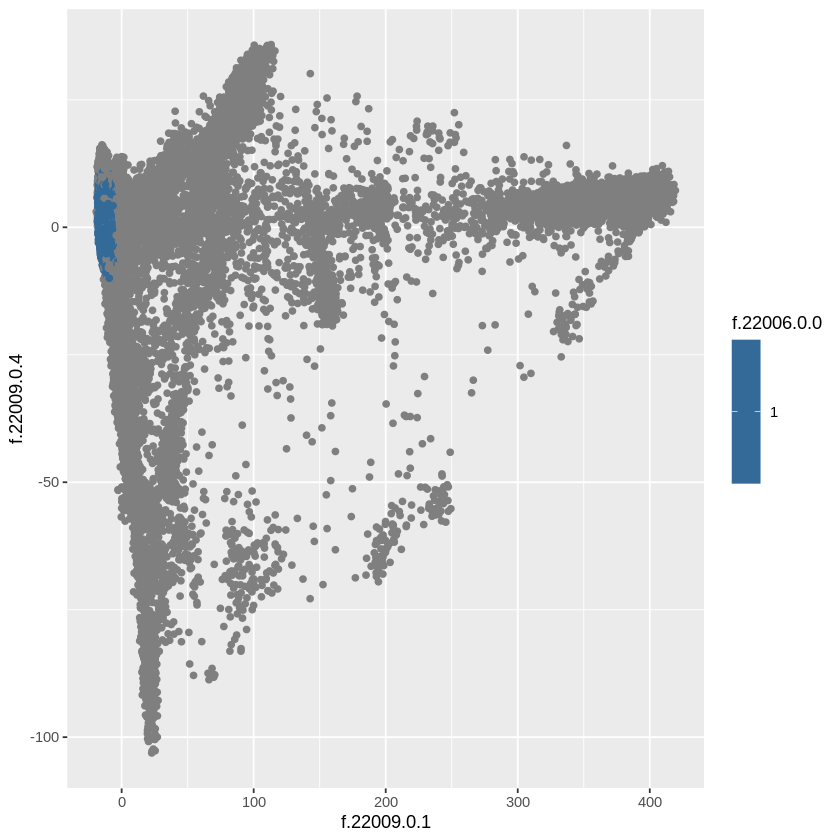

In [26]:
ggplot(cols_pca, aes(x=f.22009.0.1, y=f.22009.0.4))+ geom_point(aes(color=f.22006.0.0))

In [68]:
png(file="PC1vPC2_fulldb_byWES.png", width = 5, height = 5, unit='in', res=300)
ggplot(bd_pca, aes(x=f.22009.0.1, y=f.22009.0.2))+ geom_point(aes(color=WES, shape=WES))+
    labs(title="PC1 vs PC2 total sample by WES",
       x="PC1", y = "PC2") +
    theme_classic()
dev.off()

Warning message:
“Removed 14242 rows containing missing values (geom_point).”


png 
  2

In [45]:
length(which(bd_pca$WES == 1))

[1] 200631

In [ ]:
setwd('/home/dc2325/scratch60/pca/')

In [1]:
fam <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_s200631.fam", sep=' ', header=F)
pedind <- read.table("/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged.fam", sep='\t', header=F)

# Testing flashPCA

In [15]:
setwd("/home/dc2325/scratch60/pca")

In [16]:
library(flashpcaR)

In [17]:
fn <- "/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged"
fn

[1] "/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged"

In [18]:
f <- flashpca(fn, ndim=10)

In [20]:
head(f$projection)

1000019:1000019,0.06977305,0.0082878876,0.00188748,0.03223197,-0.041737152,0.042694385,-0.028020752,-0.003218252,0.029767902,-0.0534705591
1000035:1000035,-0.02642104,0.0008972824,0.02124188,0.04421901,0.045475997,0.034634255,-0.015119871,-0.002232416,0.004458043,0.0345384444
1000078:1000078,0.02174130,0.0262538933,-0.06440635,-0.05270910,-0.051801780,-0.029892313,-0.007134809,-0.054064208,0.024406447,-0.0213261663
1000081:1000081,-0.02057803,0.0424131660,0.03350652,0.05454286,0.013196859,0.004571951,-0.040360792,0.100594089,0.009668069,0.0089088856
1000198:1000198,0.05370262,0.0138846480,0.02126063,-0.02001493,0.003223822,0.006077779,0.020674849,0.052087752,-0.010226862,-0.0249335219
1000210:1000210,0.08634782,0.0240293370,0.00408172,-0.02581509,-0.020316439,0.006430763,0.076337651,-0.047640127,0.024232942,-0.0009809334


In [21]:
pc <- f$projection

In [26]:
head(pc)

1000019:1000019,0.06977305,0.0082878876,0.00188748,0.03223197,-0.041737152,0.042694385,-0.028020752,-0.003218252,0.029767902,-0.0534705591
1000035:1000035,-0.02642104,0.0008972824,0.02124188,0.04421901,0.045475997,0.034634255,-0.015119871,-0.002232416,0.004458043,0.0345384444
1000078:1000078,0.02174130,0.0262538933,-0.06440635,-0.05270910,-0.051801780,-0.029892313,-0.007134809,-0.054064208,0.024406447,-0.0213261663
1000081:1000081,-0.02057803,0.0424131660,0.03350652,0.05454286,0.013196859,0.004571951,-0.040360792,0.100594089,0.009668069,0.0089088856
1000198:1000198,0.05370262,0.0138846480,0.02126063,-0.02001493,0.003223822,0.006077779,0.020674849,0.052087752,-0.010226862,-0.0249335219
1000210:1000210,0.08634782,0.0240293370,0.00408172,-0.02581509,-0.020316439,0.006430763,0.076337651,-0.047640127,0.024232942,-0.0009809334


In [7]:
head(f$values)

[1] 388.8270 238.1725 195.3710 193.4536 149.7762 146.6109

In [9]:
head(f$vectors)

1000019:1000019,0.003538421,5.370293e-04,0.0001350368,0.002317386,-0.0034103694,0.0035260438,-0.0023432418,-0.0002725443,0.0026201124,-4.716845e-03
1000035:1000035,-0.001339898,5.814111e-05,0.0015197177,0.003179221,0.0037158729,0.0028603738,-0.0012644027,-0.0001890568,0.0003923882,3.046770e-03
1000078:1000078,0.001102573,1.701171e-03,-0.0046078531,-0.003789634,-0.0042327566,-0.0024687463,-0.0005966501,-0.0045785392,0.0021482077,-1.881263e-03
1000081:1000081,-0.001043580,2.748241e-03,0.0023971724,0.003921476,0.0010783238,0.0003775883,-0.0033751805,0.0085190184,0.0008509645,7.858872e-04
1000198:1000198,0.002723437,8.996820e-04,0.0015210591,-0.001439016,0.0002634205,0.0005019516,0.0017289390,0.0044111589,-0.0009001484,-2.199482e-03
1000210:1000210,0.004378982,1.557026e-03,0.0002920204,-0.001856031,-0.0016600693,0.0005311038,0.0063837536,-0.0040345027,0.0021329361,-8.653193e-05


In [11]:
head(f$loadings)

NULL

In [12]:
head(f$scale)

[1] 0.7023566 0.6871513 0.6036333 0.6354529 0.6735529 0.6784860

In [27]:
write.table(f$projection,"/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.pca", sep=" ", row.names=TRUE, col.names=F)

In [8]:
write.table(f$values,"/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.values", sep=" ", row.names=FALSE, col.names=F)

In [10]:
write.table(f$vectors,"/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.vectors", sep=" ", row.names=TRUE, col.names=F)

In [13]:
write.table(f$scale,"/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.scale", sep=" ", row.names=FALSE, col.names=F)

In [6]:
pca <- read.table("/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.pca", sep=" ")

Warning message in file(file, "rt"):
“cannot open file '/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged_flashpca.pca': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [34]:
head(pca)

,ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,IID
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1000019:1000019,0.06977305,0.0082878876,0.00188748,0.03223197,-0.041737152,0.042694385,-0.028020752,-0.003218252,0.029767902,-0.0534705591,1000019
2,1000035:1000035,-0.02642104,0.0008972824,0.02124188,0.04421901,0.045475997,0.034634255,-0.015119871,-0.002232416,0.004458043,0.0345384444,1000035
3,1000078:1000078,0.02174130,0.0262538933,-0.06440635,-0.05270910,-0.051801780,-0.029892313,-0.007134809,-0.054064208,0.024406447,-0.0213261663,1000078
4,1000081:1000081,-0.02057803,0.0424131660,0.03350652,0.05454286,0.013196859,0.004571951,-0.040360792,0.100594089,0.009668069,0.0089088856,1000081
5,1000198:1000198,0.05370262,0.0138846480,0.02126063,-0.02001493,0.003223822,0.006077779,0.020674849,0.052087752,-0.010226862,-0.0249335219,1000198
6,1000210:1000210,0.08634782,0.0240293370,0.00408172,-0.02581509,-0.020316439,0.006430763,0.076337651,-0.047640127,0.024232942,-0.0009809334,1000210


In [31]:
colnames(pca) <- c("ID","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10")

In [33]:
pca$IID <- sapply(strsplit(as.character(pca$ID),':'), "[", 1)

In [35]:
fam <- read.table("/home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged.fam", sep=" ")

In [36]:
head(fam)

,V1,V2,V3,V4,V5,V6
,<int>,<int>,<int>,<int>,<int>,<int>
1,1000019,1000019,0,0,2,1
2,1000035,1000035,0,0,1,1
3,1000078,1000078,0,0,2,1
4,1000081,1000081,0,0,1,1
5,1000198,1000198,0,0,2,1
6,1000210,1000210,0,0,1,1


In [38]:
colnames(fam) <- c("FID", "IID", "father", "mother","sex", "pheno")

In [39]:
ind <-merge(fam, pca, by="IID", all=TRUE)

In [45]:
ethnicity <- read.table("/home/dc2325/scratch60/pca/cache/ukb23155_s200631.white_ind.pheno", sep="\t" )

In [48]:
head(ethnicity)

,FID,IID,father,mother,sex,pheno,ethnicity
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000019,1000019,0,0,2,-9,1001
2,1000035,1000035,0,0,1,-9,1001
3,1000078,1000078,0,0,2,-9,1001
4,1000081,1000081,0,0,1,-9,1001
5,1000198,1000198,0,0,2,-9,1001
6,1000210,1000210,0,0,1,-9,1001


In [47]:
colnames(ethnicity) <- c("FID", "IID", "father", "mother","sex", "pheno", "ethnicity")

In [40]:
head(ind)

,IID,FID,father,mother,sex,pheno,ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000019,1000019,0,0,2,1,1000019:1000019,0.06977305,0.0082878876,0.00188748,0.03223197,-0.041737152,0.042694385,-0.028020752,-0.003218252,0.029767902,-0.0534705591
2,1000035,1000035,0,0,1,1,1000035:1000035,-0.02642104,0.0008972824,0.02124188,0.04421901,0.045475997,0.034634255,-0.015119871,-0.002232416,0.004458043,0.0345384444
3,1000078,1000078,0,0,2,1,1000078:1000078,0.02174130,0.0262538933,-0.06440635,-0.05270910,-0.051801780,-0.029892313,-0.007134809,-0.054064208,0.024406447,-0.0213261663
4,1000081,1000081,0,0,1,1,1000081:1000081,-0.02057803,0.0424131660,0.03350652,0.05454286,0.013196859,0.004571951,-0.040360792,0.100594089,0.009668069,0.0089088856
5,1000198,1000198,0,0,2,1,1000198:1000198,0.05370262,0.0138846480,0.02126063,-0.02001493,0.003223822,0.006077779,0.020674849,0.052087752,-0.010226862,-0.0249335219
6,1000210,1000210,0,0,1,1,1000210:1000210,0.08634782,0.0240293370,0.00408172,-0.02581509,-0.020316439,0.006430763,0.076337651,-0.047640127,0.024232942,-0.0009809334


In [55]:
pca_final <-merge(ind, ethnicity, by="IID",all=FALSE)

In [60]:
library(dplyr)
pca_final_r <- pca_final %>% 
    mutate(ethnicity_1 = case_when(
         ethnicity == 1001 ~  "British",
         ethnicity == 1002 ~ "Irish",
         ethnicity == 1003 ~ "Any other white background",
         ethnicity == 9000 ~ "Inconsistent_white",
         ethnicity == 1 ~ "White",
         ethnicity == -1 ~ "Do not know",
         ethnicity == -3 ~ "Prefer not to answer",
         TRUE  ~ ""))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [61]:
head(pca_final_r)

,IID,FID.x,father.x,mother.x,sex.x,pheno.x,ID,PC1,PC2,PC3,⋯,PC8,PC9,PC10,FID.y,father.y,mother.y,sex.y,pheno.y,ethnicity,ethnicity_1
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1000019,1000019,0,0,2,1,1000019:1000019,0.06977305,0.0082878876,0.00188748,⋯,-0.003218252,0.029767902,-0.0534705591,1000019,0,0,2,-9,1001,British
2,1000035,1000035,0,0,1,1,1000035:1000035,-0.02642104,0.0008972824,0.02124188,⋯,-0.002232416,0.004458043,0.0345384444,1000035,0,0,1,-9,1001,British
3,1000078,1000078,0,0,2,1,1000078:1000078,0.02174130,0.0262538933,-0.06440635,⋯,-0.054064208,0.024406447,-0.0213261663,1000078,0,0,2,-9,1001,British
4,1000081,1000081,0,0,1,1,1000081:1000081,-0.02057803,0.0424131660,0.03350652,⋯,0.100594089,0.009668069,0.0089088856,1000081,0,0,1,-9,1001,British
5,1000198,1000198,0,0,2,1,1000198:1000198,0.05370262,0.0138846480,0.02126063,⋯,0.052087752,-0.010226862,-0.0249335219,1000198,0,0,2,-9,1001,British
6,1000210,1000210,0,0,1,1,1000210:1000210,0.08634782,0.0240293370,0.00408172,⋯,-0.047640127,0.024232942,-0.0009809334,1000210,0,0,1,-9,1001,British


In [56]:
head(pca_final)

,IID,FID.x,father.x,mother.x,sex.x,pheno.x,ID,PC1,PC2,PC3,⋯,PC7,PC8,PC9,PC10,FID.y,father.y,mother.y,sex.y,pheno.y,ethnicity
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000019,1000019,0,0,2,1,1000019:1000019,0.06977305,0.0082878876,0.00188748,⋯,-0.028020752,-0.003218252,0.029767902,-0.0534705591,1000019,0,0,2,-9,1001
2,1000035,1000035,0,0,1,1,1000035:1000035,-0.02642104,0.0008972824,0.02124188,⋯,-0.015119871,-0.002232416,0.004458043,0.0345384444,1000035,0,0,1,-9,1001
3,1000078,1000078,0,0,2,1,1000078:1000078,0.02174130,0.0262538933,-0.06440635,⋯,-0.007134809,-0.054064208,0.024406447,-0.0213261663,1000078,0,0,2,-9,1001
4,1000081,1000081,0,0,1,1,1000081:1000081,-0.02057803,0.0424131660,0.03350652,⋯,-0.040360792,0.100594089,0.009668069,0.0089088856,1000081,0,0,1,-9,1001
5,1000198,1000198,0,0,2,1,1000198:1000198,0.05370262,0.0138846480,0.02126063,⋯,0.020674849,0.052087752,-0.010226862,-0.0249335219,1000198,0,0,2,-9,1001
6,1000210,1000210,0,0,1,1,1000210:1000210,0.08634782,0.0240293370,0.00408172,⋯,0.076337651,-0.047640127,0.024232942,-0.0009809334,1000210,0,0,1,-9,1001


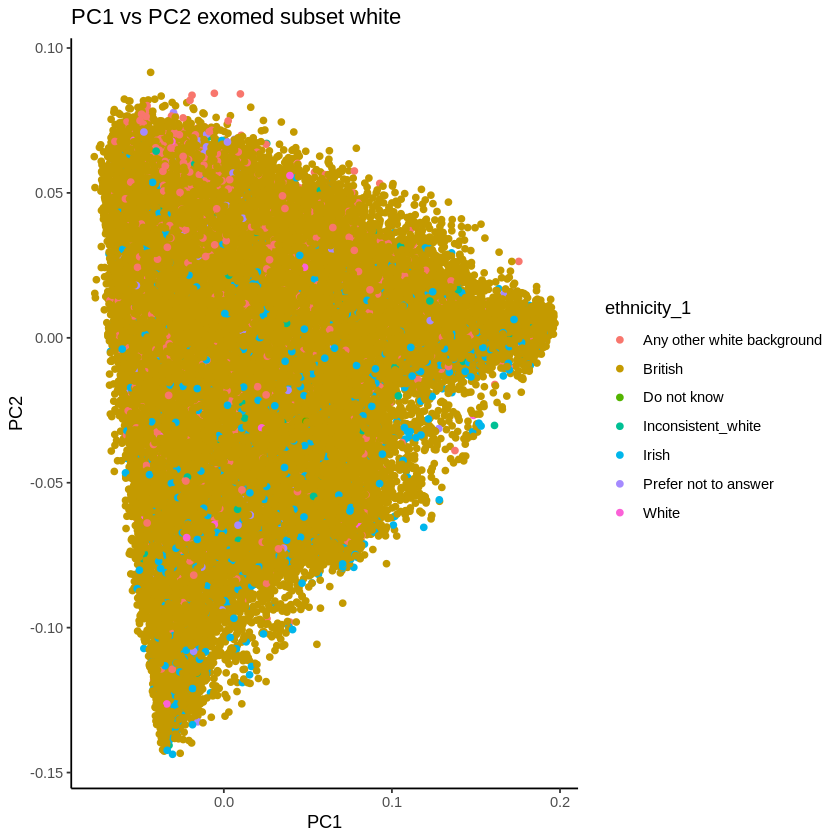

In [64]:
library(ggplot2)
ggplot(pca_final_r, aes(x=PC1, y=PC2))+ geom_point(aes(color=ethnicity_1)) +
    labs(title="PC1 vs PC2 exomed subset white",
       x="PC1", y = "PC2") +
    theme_classic()

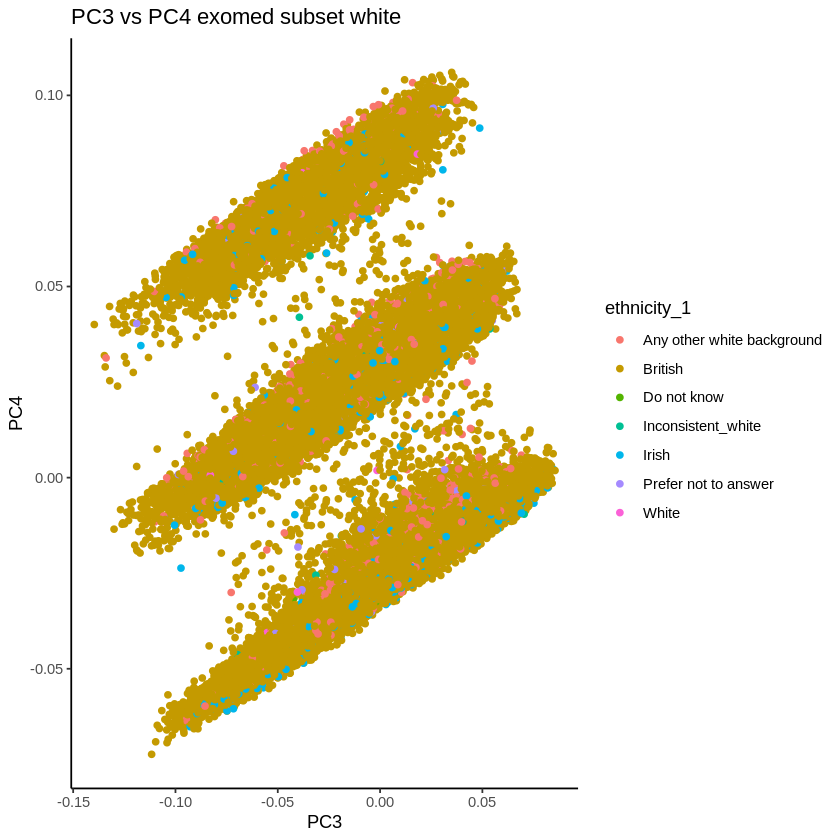

In [68]:
ggplot(pca_final_r, aes(x=PC3, y=PC4))+ geom_point(aes(color=ethnicity_1)) +
    labs(title="PC3 vs PC4 exomed subset white",
       x="PC3", y = "PC4") +
    theme_classic()

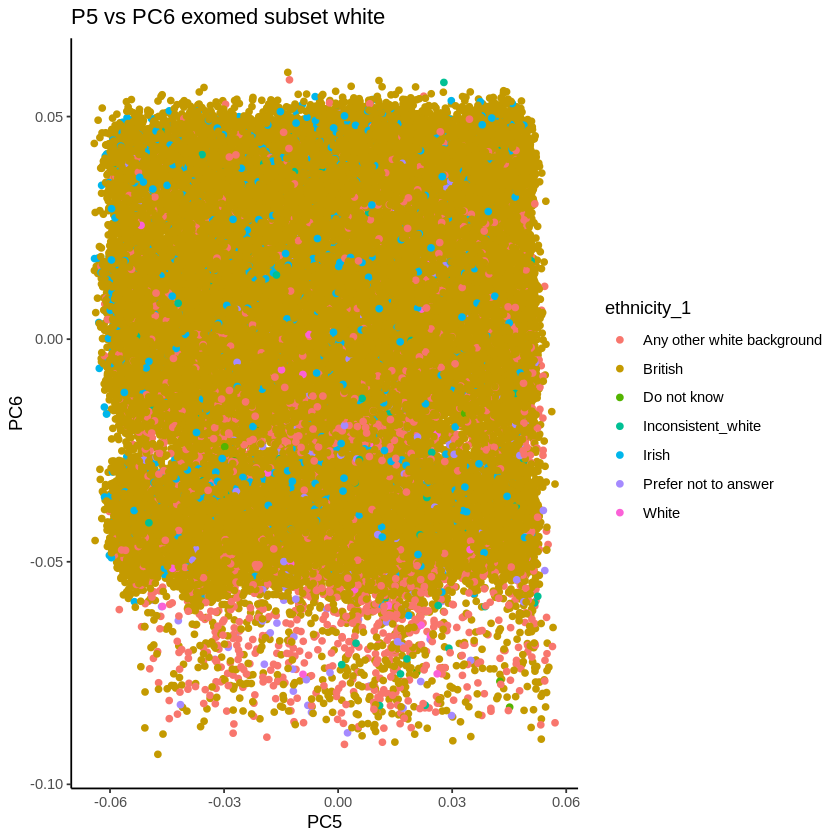

In [70]:
ggplot(pca_final_r, aes(x=PC5, y=PC6))+ geom_point(aes(color=ethnicity_1)) +
    labs(title="P5 vs PC6 exomed subset white",
       x="PC5", y = "PC6") +
    theme_classic()

# Using subset of 50K exomes

`/gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/ukb32285_exomespb.fam`

In [4]:
fam50K <- read.table("/gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/ukb32285_exomespb.fam", sep=" ")
colnames(fam50K) <- c("FID", "IID", "father", "mother","sex", "pheno")

In [5]:
head(fam50K)

,FID,IID,father,mother,sex,pheno
,<int>,<int>,<int>,<int>,<int>,<int>
1,5023838,5023838,0,0,2,-9
2,1129683,1129683,0,0,1,-9
3,4744741,4744741,0,0,1,-9
4,1258289,1258289,0,0,2,-9
5,1333104,1333104,0,0,2,-9
6,2204914,2204914,0,0,2,-9


In [ ]:
pca_50K <-merge(pca_final_r, fam50K, by="IID",all.y=TRUE)
nrow(pca_50K)
head(pca_50K)

# Making nicer PCA plots

In [1]:
setwd("/gpfs/gibbs/pi/dewan/data/UKBiobank/results/pca_exomes")
pca <- read.table("ukb23155_s200631.filtered.merged.prune.pca", sep="\t", header=TRUE)

In [2]:
head(pca)

,IID,FID.x,father.x,mother.x,sex.x,pheno.x,ID,PC1,PC2,PC3,⋯,PC8,PC9,PC10,FID.y,father.y,mother.y,sex.y,pheno.y,ethnicity,ethnicity_1
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000019,1000019,0,0,2,-9,1000019:1000019,0.01553941,0.02393847,-0.007491376,⋯,-0.0008964522,0.005746197,-0.001042337,1000019,0,0,2,-9,1001,British
2,1000035,1000035,0,0,1,-9,1000035:1000035,0.01253709,-0.02193925,0.003917083,⋯,-0.0101081273,0.003216692,-0.011721235,1000035,0,0,1,-9,1001,British
3,1000078,1000078,0,0,2,-9,1000078:1000078,0.01497620,0.01950002,0.013263954,⋯,0.0199936269,-0.004632490,-0.004389401,1000078,0,0,2,-9,1001,British
4,1000081,1000081,0,0,1,-9,1000081:1000081,-0.12213015,0.03863465,0.003532455,⋯,-0.0108502715,0.015511705,0.006788431,1000081,0,0,1,-9,1001,British
5,1000198,1000198,0,0,2,-9,1000198:1000198,0.01218179,0.02232563,-0.007680613,⋯,-0.0026506194,-0.012875036,0.004556960,1000198,0,0,2,-9,1001,British
6,1000210,1000210,0,0,1,-9,1000210:1000210,0.02526840,0.03664394,0.001277694,⋯,-0.0023364127,0.016794410,-0.012663409,1000210,0,0,1,-9,1001,British


In [5]:
library(ggplot2)
png('ukb23155_s200631.filtered.merged.prune.pc1vpc2.png', width = 6, height = 4, unit='in', res=300)
ggplot(pca, aes(x=PC1, y=PC2))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1), size=2) +
    labs(title="P1 vs PC2 exomes N=189,016",
       x="PC1", y = "PC2") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()
dev.off()

png 
  2

In [8]:
png('ukb23155_s200631.filtered.merged.prune.pc3vpc4.png', width = 6, height = 4, unit='in', res=300)
ggplot(pca, aes(x=PC3, y=PC4))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P3 vs PC4 exomes N=189,016",
       x="PC3", y = "PC4") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()
dev.off()

png 
  2

In [9]:
png('ukb23155_s200631.filtered.merged.prune.pc5vpc6.png', width = 6, height = 4, unit='in', res=300)
ggplot(pca, aes(x=PC5, y=PC6))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P5 vs PC6 exomes N=189,016",
       x="PC5", y = "PC6") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()
dev.off()

png 
  2

In [10]:
png('ukb23155_s200631.filtered.merged.prune.pc7vpc8.png', width = 6, height = 4, unit='in', res=300)
ggplot(pca, aes(x=PC7, y=PC8))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P7 vs PC8 exomes N=189,016",
       x="PC7", y = "PC8") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()
dev.off()

png 
  2

In [11]:
png('ukb23155_s200631.filtered.merged.prune.pc9vpc10.png', width = 6, height = 4, unit='in', res=300)
ggplot(pca, aes(x=PC9, y=PC10))+ geom_point(aes(color=ethnicity_1, shape=ethnicity_1, fill=ethnicity_1), size=2) +
    labs(title="P9 vs PC10 exomed subset white",
       x="PC9", y = "PC10") + scale_shape_manual(values=c(0,1,2,3,4,5,8)) +
    theme_classic()
dev.off()

png 
  2

In [2]:
setwd("~/scratch60/pca")
pca <- read.table("ukb23155_s200631.filtered.merged.prune.pca", sep="\t", header=TRUE)

In [19]:
head(pca, 100)

,IID,FID.x,father.x,mother.x,sex.x,pheno.x,ID,PC1,PC2,PC3,⋯,PC8,PC9,PC10,FID.y,father.y,mother.y,sex.y,pheno.y,ethnicity,ethnicity_1
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000272,1000272,0,0,1,-9,1000272:1000272,0.19020504,-0.134289791,-0.1406524140,⋯,-0.024820794,3.228592e-03,-0.0048921921,1000272,0,0,1,-9,6,
2,1000660,1000660,0,0,1,-9,1000660:1000660,0.02490716,0.026455473,-0.0734536630,⋯,0.017175143,4.071605e-02,0.0030603816,1000660,0,0,1,-9,6,
3,1000697,1000697,0,0,2,-9,1000697:1000697,-0.29740463,-0.004156502,0.0058610738,⋯,-0.003614845,-6.929813e-05,-0.0057914015,1000697,0,0,2,-9,4001,Caribbean
4,1001447,1001447,0,0,2,-9,1001447:1001447,-0.41749728,0.001241108,0.0122870795,⋯,0.001267753,-8.709020e-05,0.0006514491,1001447,0,0,2,-9,4001,Caribbean
5,1002004,1002004,0,0,1,-9,1002004:1002004,-0.46187445,0.017987185,0.0250831453,⋯,-0.035202371,-1.384432e-03,0.0603984087,1002004,0,0,1,-9,4002,African
6,1002354,1002354,0,0,2,-9,1002354:1002354,-0.32835147,-0.006430800,-0.0121588877,⋯,-0.007785558,-8.225936e-03,-0.0195701453,1002354,0,0,2,-9,4001,Caribbean
7,1003025,1003025,0,0,1,-9,1003025:1003025,0.19943458,-0.059695979,0.0483857127,⋯,-0.005416915,-3.807501e-03,0.0041396858,1003025,0,0,1,-9,3001,Indian
8,1003083,1003083,0,0,1,-9,1003083:1003083,0.20401828,-0.018564305,0.1229428959,⋯,0.011345875,-1.164871e-04,-0.0050152718,1003083,0,0,1,-9,3001,Indian
9,1003139,1003139,0,0,2,-9,1003139:1003139,-0.07063492,-0.066529870,-0.0752252680,⋯,-0.011297299,-2.186341e-03,-0.0114730247,1003139,0,0,2,-9,2001,White and Black Caribbean


In [7]:
library(dplyr)
no_data <- pca %>%
    filter(is.na(ethnicity_1))

In [6]:
head(no_data)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


IID,FID.x,father.x,mother.x,sex.x,pheno.x,ID,PC1,PC2,PC3,⋯,PC8,PC9,PC10,FID.y,father.y,mother.y,sex.y,pheno.y,ethnicity,ethnicity_1
<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>


> /home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged.prune.pc5vpc6.png (188.5 KiB):

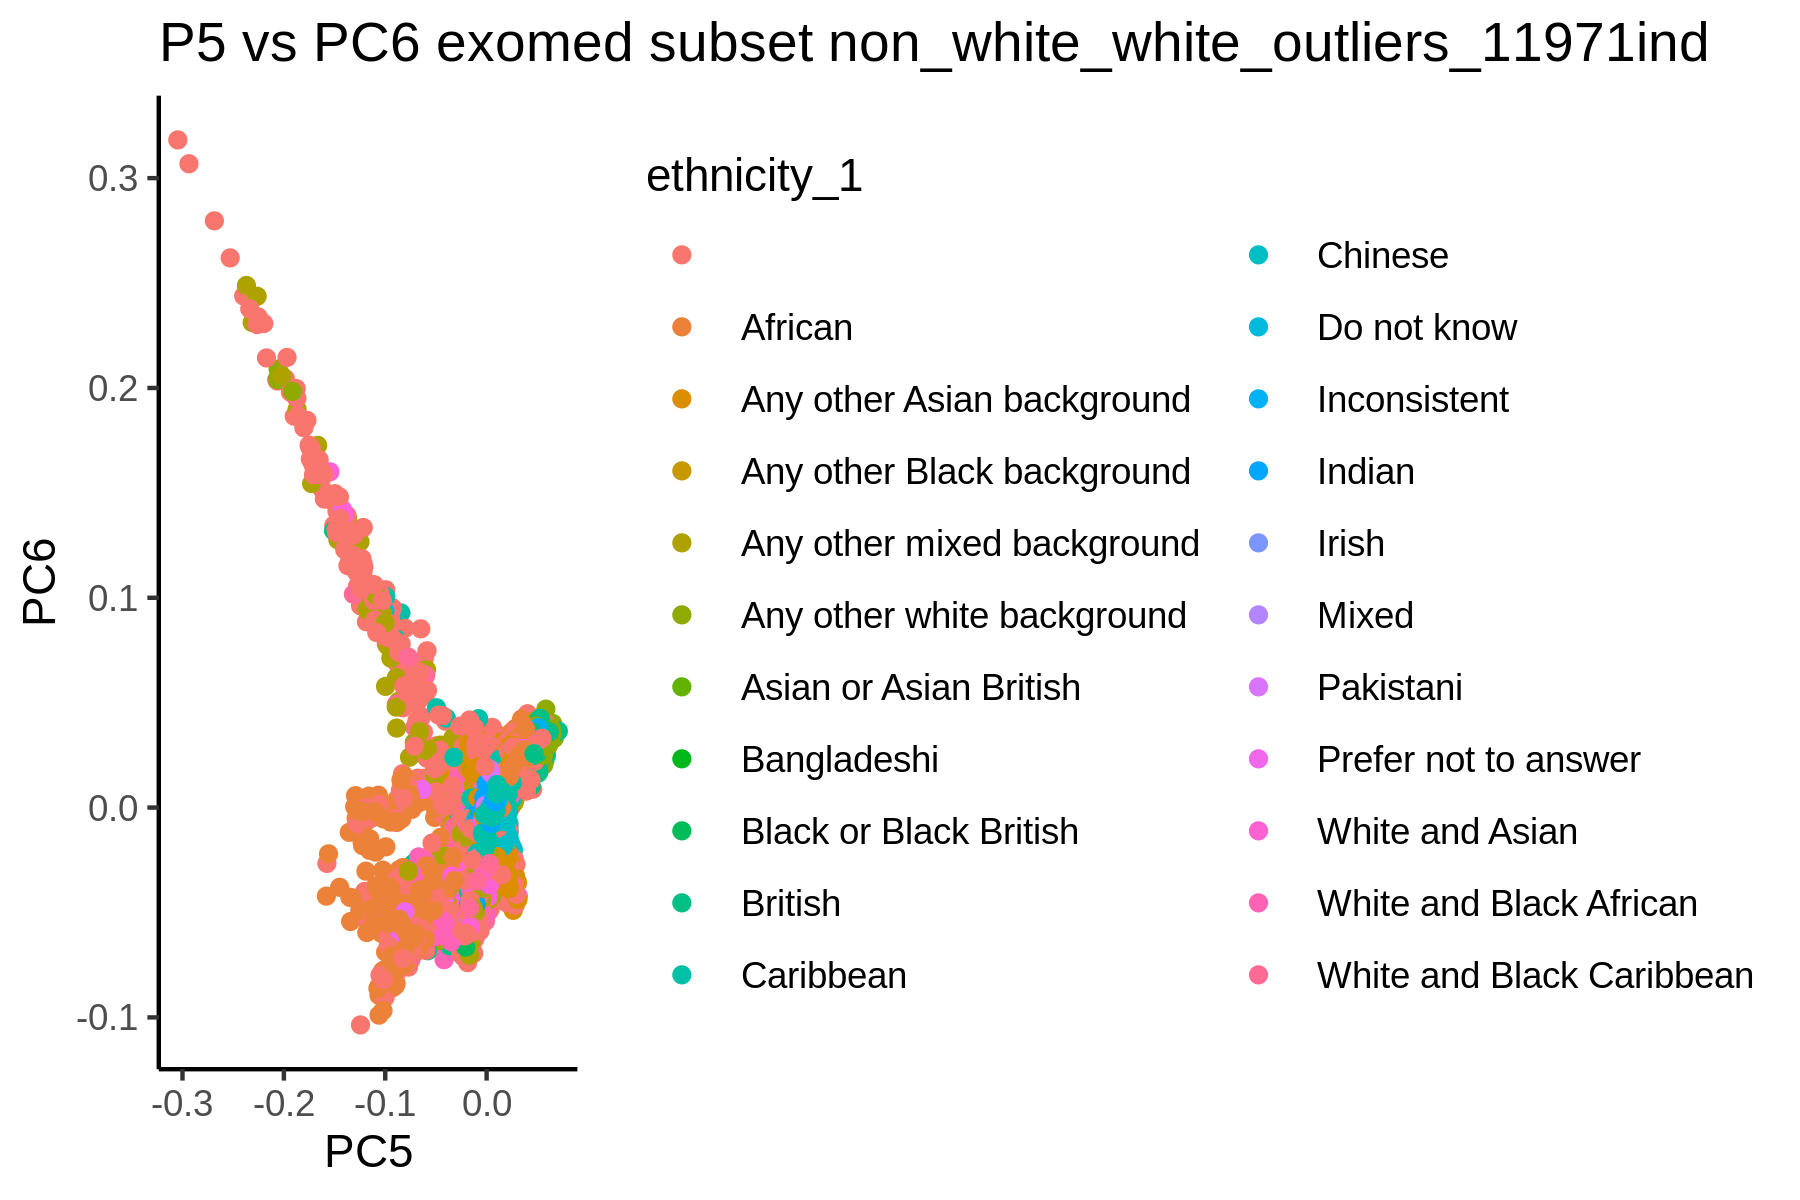

In [11]:
%preview -s png /home/dc2325/scratch60/pca/ukb23155_s200631.filtered.merged.prune.pc5vpc6.png